## BA820 Project Proposal B1 Team 4 – Childcare Cost

This notebook conducts preliminary exploratory data analysis (EDA) on the Hollywood Age Gap dataset. The goal is to identify meaningful patterns and develop specific, insight-driven domain questions suitable for unsupervised analysis. The analysis emphasizes interpretation and decision relevance rather than early algorithm selection.


In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/BA820 Unsupervised/Hollywood Age Gap/age_gaps.csv"
df = pd.read_csv(path)

df.head()


,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


In [ ]:
file_id = "1H81EeIGw-C7zjsvkTKFnkKdXVd_jvISh"
url = f"https://drive.google.com/uc?id={file_id}"

output = "age_gap_data.csv"
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
df.info()

Downloading...
From: https://drive.google.com/uc?id=1H81EeIGw-C7zjsvkTKFnkKdXVd_jvISh
To: /content/age_gap_data.csv
100%|██████████| 122k/122k [00:00<00:00, 46.6MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_name          1155 non-null   object
 1   release_year        1155 non-null   int64 
 2   director            1155 non-null   object
 3   age_difference      1155 non-null   int64 
 4   couple_number       1155 non-null   int64 
 5   actor_1_name        1155 non-null   object
 6   actor_2_name        1155 non-null   object
 7   character_1_gender  1155 non-null   object
 8   character_2_gender  1155 non-null   object
 9   actor_1_birthdate   1155 non-null   object
 10  actor_2_birthdate   1155 non-null   object
 11  actor_1_age         1155 non-null   int64 
 12  actor_2_age         1155 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 117.4+ KB


# 1. Dataset Overview

The Hollywood Age Gap dataset contains information about on-screen couples in films, including release year, director, character genders, actor ages, and the age difference between the two actors. This dataset is suitable for exploratory and unsupervised analysis because it supports segmentation (by gender pairing, era, and director) and identification of extreme cases (anomalous age gaps).


In [ ]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_name          1155 non-null   object
 1   release_year        1155 non-null   int64 
 2   director            1155 non-null   object
 3   age_difference      1155 non-null   int64 
 4   couple_number       1155 non-null   int64 
 5   actor_1_name        1155 non-null   object
 6   actor_2_name        1155 non-null   object
 7   character_1_gender  1155 non-null   object
 8   character_2_gender  1155 non-null   object
 9   actor_1_birthdate   1155 non-null   object
 10  actor_2_birthdate   1155 non-null   object
 11  actor_1_age         1155 non-null   int64 
 12  actor_2_age         1155 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 117.4+ KB


# 2. Minimal Data Preparation

Only minimal preparation is performed to preserve the dataset’s original structure for EDA. We verify missingness, confirm types, and create a small number of derived variables to support interpretation (without filtering or removing outliers).


In [ ]:
df.isna().sum()

,0
movie_name,0
release_year,0
director,0
age_difference,0
couple_number,0
actor_1_name,0
actor_2_name,0
character_1_gender,0
character_2_gender,0
actor_1_birthdate,0


In [ ]:
df.describe(include="all")

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
count,1155,1155.000000,1155,1155.000000,1155.000000,1155,1155,1155,1155,1155,1155,1155.000000,1155.000000
unique,830,NaN,510,NaN,NaN,567,647,2,2,562,640,NaN,NaN
top,Love Actually,NaN,Woody Allen,NaN,NaN,Keanu Reeves,Scarlett Johansson,man,woman,1964-09-02,1984-11-22,NaN,NaN
freq,7,NaN,20,NaN,NaN,24,13,941,940,24,13,NaN,NaN
mean,NaN,2000.799134,NaN,10.424242,1.398268,NaN,NaN,NaN,NaN,NaN,NaN,40.635498,30.211255
std,NaN,16.365819,NaN,8.511086,0.754419,NaN,NaN,NaN,NaN,NaN,NaN,10.424173,7.495952
min,NaN,1935.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,17.000000
25%,NaN,1997.000000,NaN,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,25.000000
50%,NaN,2004.000000,NaN,8.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,29.000000
75%,NaN,2012.000000,NaN,15.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,34.000000


In [ ]:
df["signed_gap"] = df["actor_1_age"] - df["actor_2_age"]
df["pair_type"] = df["character_1_gender"] + "-" + df["character_2_gender"]

In [ ]:
df["signed_gap"]

,signed_gap
0,52
1,50
2,49
3,45
4,43
...,...
1150,0
1151,0
1152,0
1153,0


# 3. Exploratory Data Analysis

##EDA 1: Distribution and Extreme Values

We first examine the distribution of age differences and quantify the upper tail (e.g., 90th/95th/99th percentiles). This helps determine whether extreme age gaps are rare but meaningful and motivates anomaly-oriented questions.


In [ ]:
df["age_difference"].describe()
df["age_difference"].quantile([0.9, 0.95, 0.99])

,age_difference
0.90,23.00
0.95,27.00
0.99,35.46


**Interpretation:**  
Age differences in couples tend to be skewed, with most pairs having pretty normal gaps, but there are some that really stand out. The top 5% and 1% of age gaps show some pretty big differences, which could point to unique dating trends. This makes it important to take a closer look at the usual couples versus those that are more extreme or unusual.

## EDA 2: Gender Pairing Structure

We examine how frequently different gender pairings occur. Because the dataset preserves ordering (actor_1 vs actor_2), man–woman and woman–man may reflect different conventions and should be treated as distinct categories during EDA.


In [ ]:
df["pair_type"].value_counts()

,count
pair_type,
man-woman,929
woman-man,203
man-man,12
woman-woman,11


**Interpretation:**  
The data shows a big imbalance as most couples are man–woman, there are fewer woman–man pairs, and same-gender couples are really rare. This imbalance is important because it reflects how casting norms influence both who gets represented and how couples are documented. It also raises interesting comparisons between the different types of pairs.


## EDA 3: Trend Over Time (Recent Years Preview)

We preview recent years to evaluate whether average age gaps have declined, stabilized, or fluctuated in modern releases. If trends are non-monotonic, it suggests that large age gaps persist and may be driven by specific creators or subsets of films.


In [ ]:
df.groupby("release_year")["age_difference"].mean().tail(20)

,age_difference
release_year,
2003,10.868421
2004,8.815789
2005,7.500000
2006,10.050000
2007,7.608696
2008,10.106383
2009,11.204545
2010,9.714286
2011,8.382353


**Interpretation:**  
In recent year, the numbers haven't been dropping steadily. Instead, the average gap fluctuates, with some big jumps, which shows that there are still major disparities in modern Hollywood. It seems like this could be affected by years with fewer movies or some outlier films. So, it's worth looking into what causes those years with the biggest gaps.

## EDA 4: Most Extreme Couples

We list the most extreme age-gap cases to identify which movies dominate the upper tail and whether these extremes are concentrated in certain eras, directors, or gender pairings.


In [ ]:
df.nlargest(10, "age_difference")[["movie_name","release_year","actor_1_name","actor_2_name","age_difference","pair_type"]]

,movie_name,release_year,actor_1_name,actor_2_name,age_difference,pair_type
0,Harold and Maude,1971,Ruth Gordon,Bud Cort,52,woman-man
1,Venus,2006,Peter O'Toole,Jodie Whittaker,50,man-woman
2,The Quiet American,2002,Michael Caine,Do Thi Hai Yen,49,man-woman
3,The Big Lebowski,1998,David Huddleston,Tara Reid,45,man-woman
4,Beginners,2010,Christopher Plummer,Goran Visnjic,43,man-man
5,Poison Ivy,1992,Tom Skerritt,Drew Barrymore,42,man-woman
6,Whatever Works,2009,Larry David,Evan Rachel Wood,40,man-woman
7,Entrapment,1999,Sean Connery,Catherine Zeta-Jones,39,man-woman
8,Husbands and Wives,1992,Woody Allen,Juliette Lewis,38,man-woman
9,Magnolia,1999,Jason Robards,Julianne Moore,38,man-woman


**Interpretation:**  
The most extreme examples show that very large age gaps occur across decades and are not limited to early Hollywood. Many extreme cases involve man–woman pairings, consistent with observed imbalance, while rare same-gender extremes also appear. These results motivate anomaly-focused questions and creator/era concentration checks.


## EDA 5: Director Frequency (Potential Creator-Level Effects)

Because directors appear multiple times, casting patterns may reflect creator-level “signatures.” We check which directors recur most frequently to assess feasibility for director-level grouping or clustering.


In [ ]:
df["director"].value_counts().head(15)

,count
director,
Woody Allen,20
John Glen,15
Martin Scorsese,13
Steven Spielberg,10
Mike Newell,10
Terence Young,9
Nancy Meyers,9
Mike Nichols,9
Guy Hamilton,9


**Interpretation:**  
Some directors appear many times, which lets us look into whether the big age gaps are mostly happening with a specific group of these repeat creators. This supports questions about clustering directors by age-gap profiles or identifying directors disproportionately represented among outliers.


## 8. Visualization 1: Distribution of Age Differences

This visualization highlights whether age gaps are concentrated around small values and whether there is a long tail of extreme cases.


In [ ]:
df["gender_pair"] = df["character_1_gender"].str.strip().str.lower() + " → " + df["character_2_gender"].str.strip().str.lower()

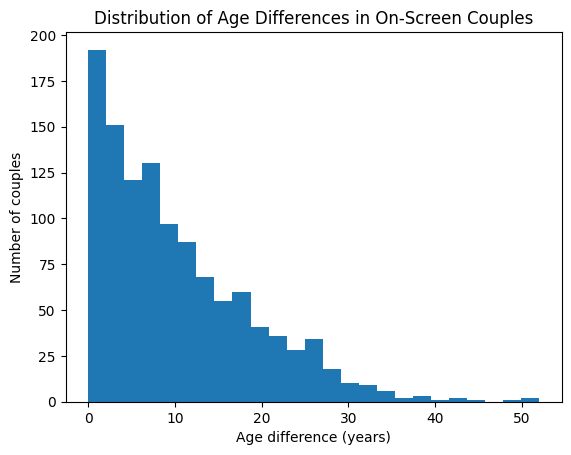

In [ ]:
plt.figure()
plt.hist(df["age_difference"], bins=25)
plt.title("Distribution of Age Differences in On-Screen Couples")
plt.xlabel("Age difference (years)")
plt.ylabel("Number of couples")
plt.show()


**Interpretation**

The age differences in the dataset are strongly right-skewed, with most couples having small age gaps of 0–5 years. As the gap increases beyond 10–15 years, the number of couples steadily declines, although there are rare cases of age differences over 40–50 years. This indicates a mix of typical pairings and a few unusual outliers, which is valuable for clustering and anomaly detection in our analysis.

## 9. Visualization 2: Average Age Gap Over Time

This chart examines whether average age gaps have shifted over decades and whether variability differs by historical period.


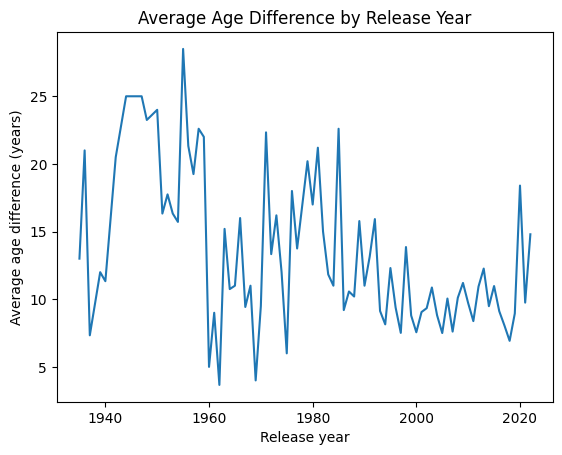

In [ ]:
yearly = df.groupby("release_year")["age_difference"].mean().reset_index()

plt.figure()
plt.plot(yearly["release_year"], yearly["age_difference"])
plt.title("Average Age Difference by Release Year")
plt.xlabel("Release year")
plt.ylabel("Average age difference (years)")
plt.show()


This chart illustrates how the average age differenc* between on-screen couples varies by decade. The 1940s–1960s show higher and more volatile age gaps, with spikes over 20 years. After the 1980s, age differences trend toward smaller and more stable ranges, mostly around 8–12 years. The fluctuations in earlier decades may be due to fewer films or a few extreme examples. Overall, it suggests that larger age-gap pairings were more common historically, while recent films feature more moderate age gaps.

## 10. Visualization 3: Average Age Gap by Pair Type

This chart compares average age gaps across pairing types (man–woman, woman–man, man–man, woman–woman). The goal is to assess whether age gaps differ systematically by gender pairing and ordering.


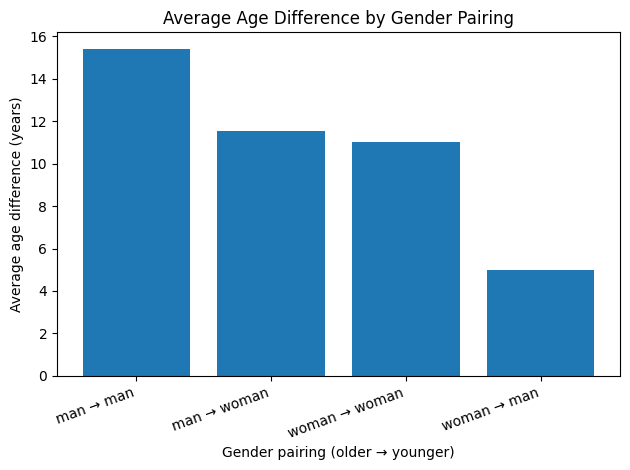

In [ ]:
gp = (df.groupby("gender_pair")["age_difference"]
        .mean()
        .sort_values(ascending=False))

plt.figure()
plt.bar(gp.index, gp.values)
plt.title("Average Age Difference by Gender Pairing")
plt.xlabel("Gender pairing (older → younger)")
plt.ylabel("Average age difference (years)")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


This bar chart shows the average age differences in various gender pairings, with the arrow pointing from the older character to the younger one. The biggest age gap is in man-man couples, indicating larger differences in same-gender male pairings. Both man-woman and woman-woman have similar mid-range gaps, while the smallest is in woman-man pairings, where the woman is older. This suggests Hollywood often portrays larger age differences when the older partner is male, while age-reversed pairings are generally less extreme.



## 11. Domain Questions (EDA-Motivated)

Below are four domain questions motivated directly by the patterns observed in EDA. They focus on insight, interpretation, and decision relevance, and are suitable for unsupervised or exploratory analysis (segmentation, similarity, and anomaly detection).


### Q1. Casting Norms and Directional Asymmetry  
Are there systematic age-gap differences in couples where man is the older actor followed by woman, woman older actor followed by man and same-gender couples and how do these differences demonstrate casting conventions and power differences in Hollywood?


### Q2. Persistence of Large Age Gaps Over Time  
If average age gaps have not steadily declined, what types of movies or creators drive the persistence or resurgence of large gaps in recent decades?


### Q3. Couple Archetypes and Segmentation  
Are there distinct “types” of on-screen couples that Hollywood repeatedly produces (based on age gap, pairing type, and era), and how do these archetypes vary across time periods and directors?


### Q4. Outliers and Concentration of Extreme Cases  
Which films contain unusually extreme age-gap couples relative to other movies from the same era and pairing type—and are these outliers concentrated among specific directors or time periods?
